In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read master table

In [3]:
## directory paths
master_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/DGE_correlation_tables/220114_MASTER_dge_correlation_table.csv'

In [4]:
## read master table
master = pd.read_csv(master_dir, index_col=0)
master.head(5)

,Alveolar_Epithelium_invivo_log2FC,Alveolar_Epithelium_invivo_pval_adj,Alveolar_Epithelium_invivo_pct_healthy,Alveolar_Epithelium_invivo_pct_ILD,Alveolar_Epithelium_exvivo_log2FC,Alveolar_Epithelium_exvivo_pval_adj,Alveolar_Epithelium_exvivo_pct_CC,Alveolar_Epithelium_exvivo_pct_FC,Alveolar_Epithelium_CMP4_log2FC,Alveolar_Epithelium_CMP4_pval_adj,...,NK_cells_exvivo_pct_CC,NK_cells_exvivo_pct_FC,NK_cells_CMP4_log2FC,NK_cells_CMP4_pval_adj,NK_cells_CMP4_pct_CC,NK_cells_CMP4_pct_FC_CMP4,NK_cells_Nintedanib_log2FC,NK_cells_Nintedanib_pval_adj,NK_cells_Nintedanib_pct_CC,NK_cells_Nintedanib_pct_FC_Nintedanib
gene,,,,,,,,,,,,,,,,,,,,,
GPX1,10.0,0.0,0.208328,0.233239,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAPRT,10.0,0.0,0.056900,0.035651,-0.775898,0.000006,0.193662,0.151819,-1.067108,6.361869e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRYBG3,10.0,0.0,0.045819,0.050550,-0.267367,0.066029,0.268486,0.260979,-0.275646,3.066237e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIFA,10.0,0.0,0.166655,0.089571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LUC7L2,10.0,0.0,0.137390,0.115999,NaN,NaN,NaN,NaN,-0.645198,3.971449e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,1.510993,0.000156,0.016423,0.077441


In [5]:
alv_epi_master = master[['Alveolar_Epithelium_invivo_log2FC', 'Alveolar_Epithelium_invivo_pval_adj',
                         'Alveolar_Epithelium_exvivo_log2FC', 'Alveolar_Epithelium_exvivo_pval_adj']].dropna()

In [6]:
air_epi_master = master[['Airway_Epithelium_invivo_log2FC', 'Airway_Epithelium_invivo_pval_adj',
                         'Airway_Epithelium_exvivo_log2FC', 'Airway_Epithelium_exvivo_pval_adj']].dropna()

### Visualize gene expression changes in Alveolar Epithelium

In [7]:
#genes_up = ['KRT14','MMP7','VIM','IL32','CDKN1A','AGRN','STAT1','CHD3','LAMB3','LAMC2','HES1','ITGAV','ITGB1','ITGB6','SOX4','MYH9','NFKB1','NFKB2','NFKBIA',
#        'NOTCH2','CCL2','BMP1','CLCN5','KRT7','CHI3L2','CCN1','CCN1','MTSS1','TNFAIP8','TPM1','SOD2','BIRC3','IGFBP7','SLC7A2']
#genes_down = ['APOC1','AGER','HOPX','CAV1','KRT19','DSTN','ACSL1','SPRY1','SOD3','SOX5','SCGB3A2','VIM','RTKN2','FABP5','AREG',
#              'SLCO4C1','CA2','SLC6A14','PLIN2','MMP28','ELF5','CNR1','SASH1','SNTB1','ERP27']

In [8]:
genes = ['MMP7','IL32','CDKN1A','AGRN','STAT1','CHD3','LAMB3','LAMC2','HES1','ITGAV','ITGB1','ITGB6','SOX4','MYH9',
         'NFKB1','NFKB2','NFKBIA','NOTCH2','CCL2','BMP1','CLCN5','KRT7','CHI3L2','CCN1','MTSS1','TNFAIP8',
         'TPM1','SOD2','BIRC3','IGFBP7','SLC7A2','APOC1','AGER','HOPX','CAV1','KRT19','DSTN','ACSL1','SPRY1','SOD3',
         'SOX5','SCGB3A2','VIM','RTKN2','FABP5','AREG','SLCO4C1','CA2','MMP28','ELF5','CNR1',
         'SASH1','SNTB1','ERP27']

In [9]:
alv_epi_master = alv_epi_master.loc[genes,:]
alv_epi_master = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_invivo_pval_adj'] < 0.05) & (alv_epi_master['Alveolar_Epithelium_exvivo_pval_adj'] < 0.05)]

In [10]:
alv_epi_master = alv_epi_master.sort_values(by = 'Alveolar_Epithelium_invivo_log2FC', ascending = False)

In [11]:
invivo = alv_epi_master[['Alveolar_Epithelium_invivo_log2FC']]
invivo[invivo < -2] = -2
invivo[invivo > 2] = 2
invivo['gene'] = invivo.index
exvivo = alv_epi_master[['Alveolar_Epithelium_exvivo_log2FC']]
exvivo[exvivo < -2] = -2
exvivo['gene'] = exvivo.index

/tmp/ipykernel_1152921/457998542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invivo[invivo < -2] = -2
/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/tmp/ipykernel_1152921/457998542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

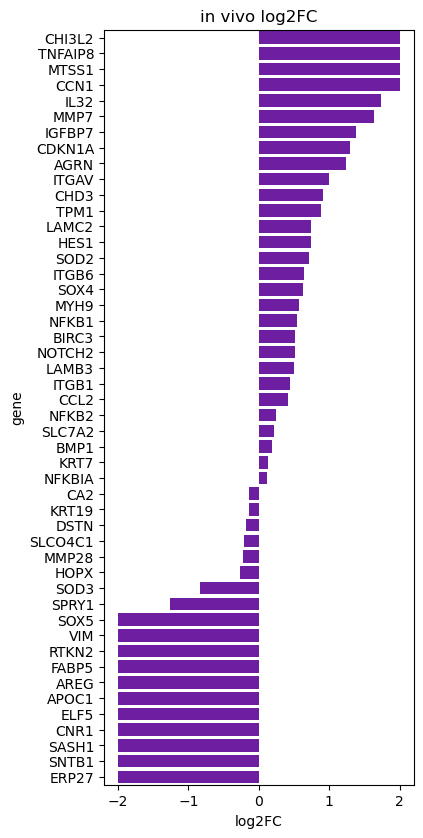

In [12]:
sb.barplot(data = invivo,
           x = 'Alveolar_Epithelium_invivo_log2FC',
           y = 'gene',
           color = '#7209b7',
           ax = plt.figure(figsize=(4, 10), dpi = 100).gca()
          ).set(title='in vivo log2FC',
                xlabel = 'log2FC',
                ylabel = 'gene'
               )
plt.savefig(fig_dir + 'barplot_alveolar_epithelium_logFC_INVIVO.pdf')
plt.show()

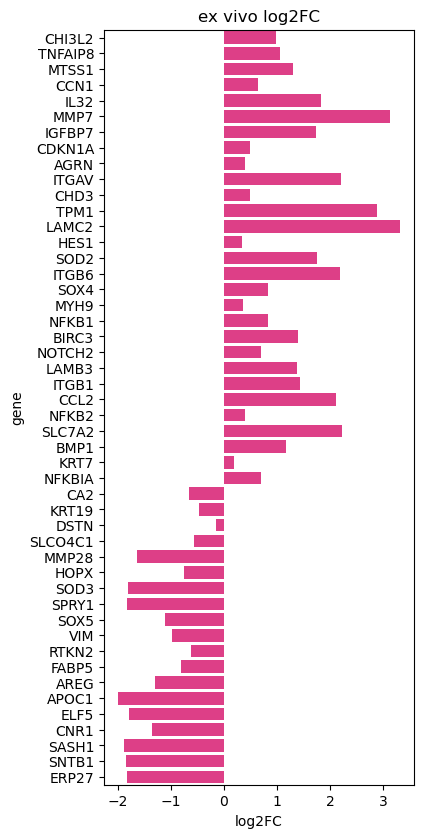

In [13]:
sb.barplot(data = exvivo,
           x = 'Alveolar_Epithelium_exvivo_log2FC',
           y = 'gene',
           color = '#f72585',
           ax = plt.figure(figsize=(4, 10), dpi = 100).gca()
          ).set(title='ex vivo log2FC',
                xlabel = 'log2FC',
                ylabel = 'gene')
plt.savefig(fig_dir + 'barplot_alveolar_epithelium_logFC_EXVIVO.pdf')
plt.show()

###  Visualize invivo and exvivo log2FC in same plot

In [14]:
invivo = invivo[['Alveolar_Epithelium_invivo_log2FC','gene']]
invivo.rename(columns = {'Alveolar_Epithelium_invivo_log2FC':'log2FC'}, inplace = True)
invivo['condition'] = 'invivo - IPF'

In [15]:
exvivo = exvivo[['Alveolar_Epithelium_exvivo_log2FC','gene']]
exvivo.rename(columns = {'Alveolar_Epithelium_exvivo_log2FC':'log2FC'}, inplace = True)
exvivo['condition'] = 'exvivo - FC'

In [16]:
conserved = pd.concat([invivo, exvivo], axis=0)

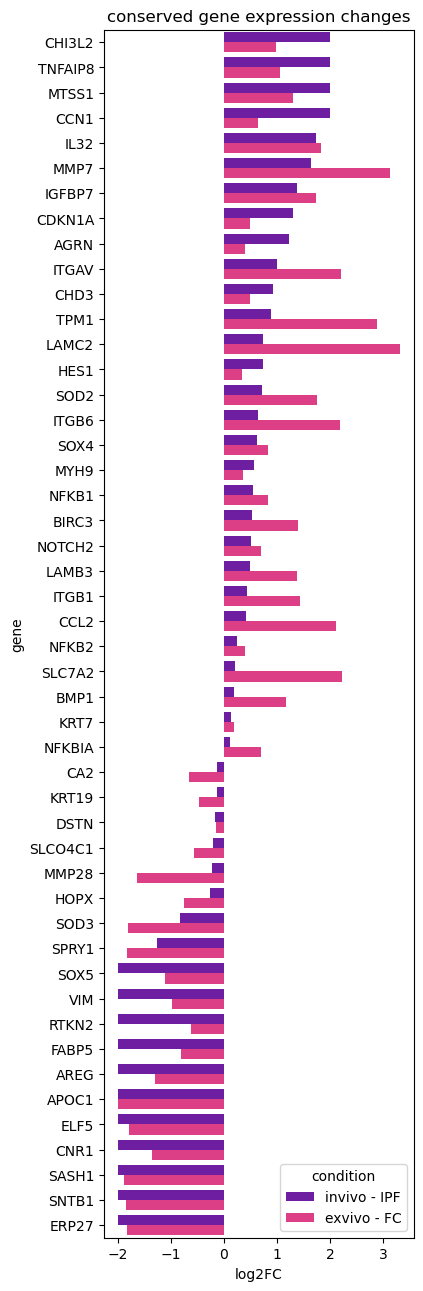

In [17]:
sb.barplot(data = conserved,
           x = 'log2FC',
           y = 'gene',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 16), dpi = 100).gca()
          ).set(title='conserved gene expression changes',
                xlabel = 'log2FC',
                ylabel = 'gene'
               )
plt.savefig(fig_dir + 'barplot_alveolar_epithelium_conserved_DE_genes.pdf')
plt.show()

### Venn diagramms

In [25]:
logfc_thresh = 0.25

In [43]:
alv_epi_master = master[['Alveolar_Epithelium_invivo_log2FC', 'Alveolar_Epithelium_invivo_pval_adj',
                         'Alveolar_Epithelium_exvivo_log2FC', 'Alveolar_Epithelium_exvivo_pval_adj']].dropna()

In [44]:
alv_epi_master_up = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_invivo_log2FC'] > logfc_thresh) & (alv_epi_master['Alveolar_Epithelium_exvivo_log2FC'] > logfc_thresh)]
alv_epi_master_down = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_invivo_log2FC'] < -logfc_thresh) & (alv_epi_master['Alveolar_Epithelium_exvivo_log2FC'] < -logfc_thresh)]

In [45]:
invivo_up = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_invivo_log2FC'] > logfc_thresh)]
exvivo_up = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_exvivo_log2FC'] > logfc_thresh)]
invivo_down = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_invivo_log2FC'] < -logfc_thresh)]
exvivo_down = alv_epi_master[(alv_epi_master['Alveolar_Epithelium_exvivo_log2FC'] < -logfc_thresh)]

In [46]:
from matplotlib_venn import venn2, venn2_circles

In [47]:
## define subsets for upregulated genes
subsets_up = (len(np.setdiff1d(invivo_up.index, exvivo_up.index)),
                 len(np.setdiff1d(exvivo_up.index, invivo_up.index)),
                 len(np.intersect1d(invivo_up.index, exvivo_up.index)))

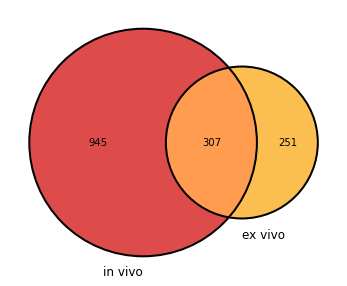

In [48]:
venn2(subsets = subsets_up,
      set_labels = ('in vivo', 
                    'ex vivo'),
      set_colors=('#d00000',
                  '#faa307'),alpha=0.7)
  
# add outline
venn2_circles(subsets = subsets_up) 
plt.savefig(fig_dir + 'Alveolar_Epithelium_UP_overlap_INVIVO_EXVIVO.pdf')
plt.show()

In [49]:
## define subsets for downregulated genes
subsets_down = (len(np.setdiff1d(invivo_down.index, exvivo_down.index)),
                 len(np.setdiff1d(exvivo_down.index, invivo_down.index)),
                 len(np.intersect1d(invivo_down.index, exvivo_down.index)))

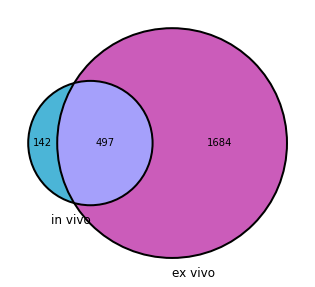

In [50]:
venn2(subsets = subsets_down,
      set_labels = ('in vivo', 
                    'ex vivo'),
      set_colors=('#0096c7',
                  '#b5179e'),alpha=0.7)
  
# add outline
venn2_circles(subsets = subsets_down) 
plt.savefig(fig_dir + 'Alveolar_Epithelium_DOWN_overlap_INVIVO_EXVIVO.pdf')
plt.show()